#1) Importing libraries:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2) Load the Dataset:

In [15]:
df = pd.read_csv("/content/drive/MyDrive/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#3) Performing Visualization:

1) Univariate Analysis

<Axes: xlabel='sex', ylabel='count'>

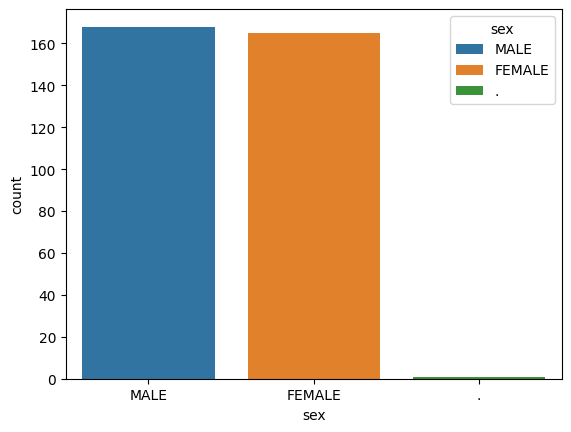

In [16]:
sns.countplot(data = df, x='sex', hue = 'sex' )

<Axes: xlabel='island', ylabel='count'>

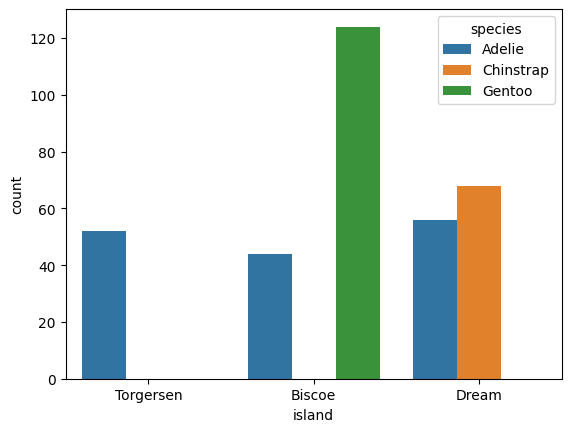

In [17]:
sns.countplot(data = df , x = 'island', hue = 'species')

2) Bivariate Analysis

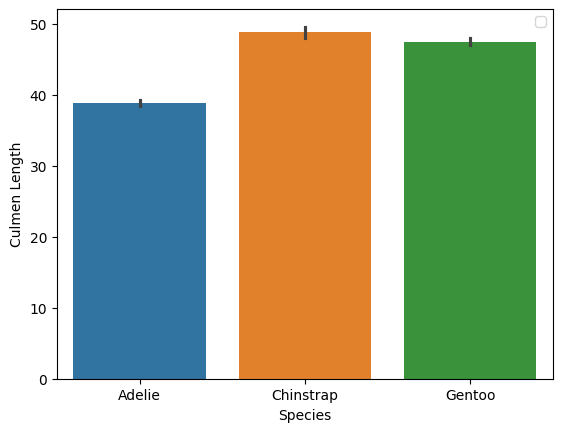

In [18]:
sns.barplot(x = df['species'],y = df['culmen_length_mm'], hue = df['species'])
plt.xlabel("Species")
plt.ylabel("Culmen Length")
plt.legend()
plt.show()

In [19]:
u = df['island'].unique()


In [20]:
v =df['species'].value_counts()


In [21]:
w = v.values

Text(0, 0.5, 'No of Species')

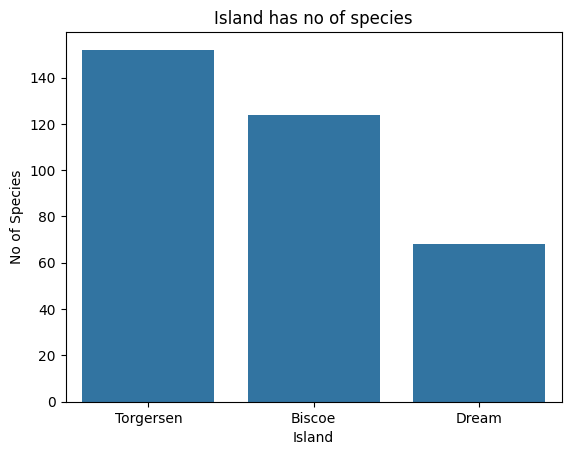

In [22]:
sns.barplot( x = u , y = w)
plt.title('Island has no of species')
plt.xlabel('Island')
plt.ylabel('No of Species')

3) Multivariate Analysis


In [23]:
cor = df.corr()
cor

<ipython-input-23-150a9db5d4b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

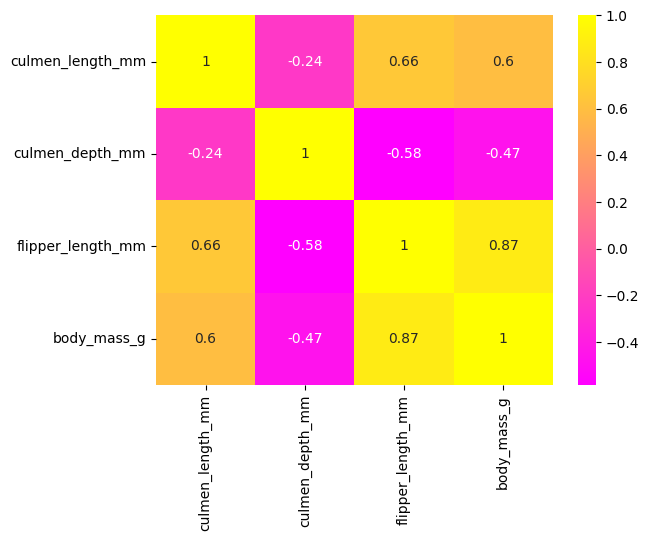

In [24]:
sns.heatmap(cor , cmap = 'spring', annot = True)

#4) Descriptive Statistics

In [25]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#Creating a copy of Dataset

In [27]:
df1 = df.copy()

# 5) Checking for Null values

In [28]:
df1.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Null values are present in the dataset.

In [29]:
df1.shape

(344, 7)

In [30]:
df1['culmen_depth_mm'].describe()

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: culmen_depth_mm, dtype: float64

In [31]:
df1['culmen_length_mm'].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64

Replacing the Null values with mean of that particular column

In [32]:
def func(data,coln):
  df1[f'{coln}'].fillna(df1[f'{coln}'].mean(),inplace = True)

func(df1,'culmen_depth_mm')
func(df1,'culmen_length_mm')
func(df1,'body_mass_g')
func(df1,'flipper_length_mm')

In [33]:
df1.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [34]:
df1['sex'].mode()

0    MALE
Name: sex, dtype: object

Here replacing the null values in the sex column that is a category column with mode of that column.

In [35]:
df1['sex'].fillna(df['sex'].mode()[0],inplace = True)

In [36]:
df1.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [37]:
df1.shape

(344, 7)

#6) Checking for outliers

Text(0, 0.5, 'body mass in grams')

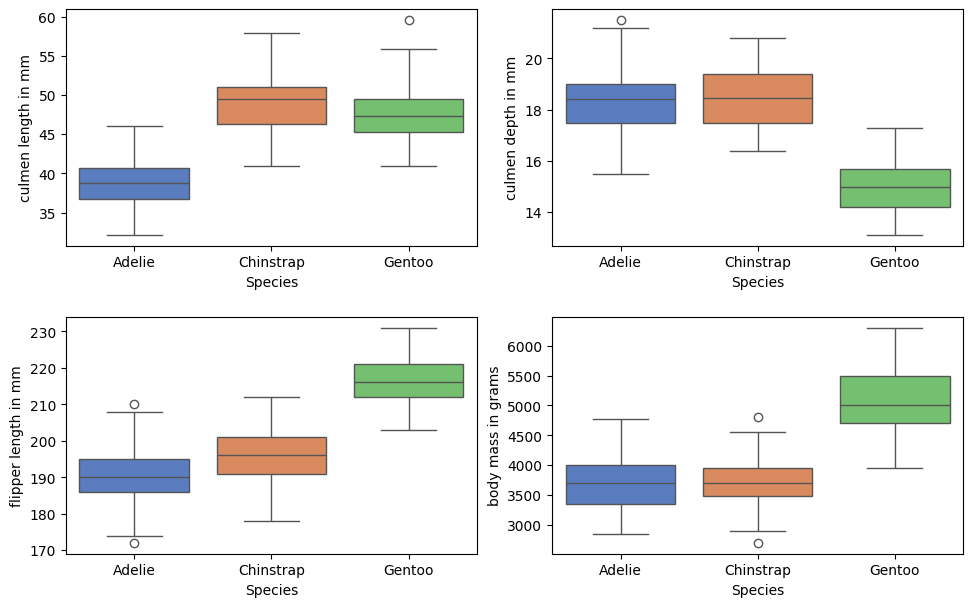

In [38]:
sns.set_palette('muted')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='species',y='culmen_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen length in mm")
plt.subplot(2,2,2)
sns.boxplot(data=df,x='species',y='culmen_depth_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.boxplot(data=df,x='species',y='flipper_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("flipper length in mm")
plt.subplot(2,2,4)
sns.boxplot(data=df,x='species',y='body_mass_g',hue='species')
plt.xlabel("Species")
plt.ylabel("body mass in grams")

<Axes: >

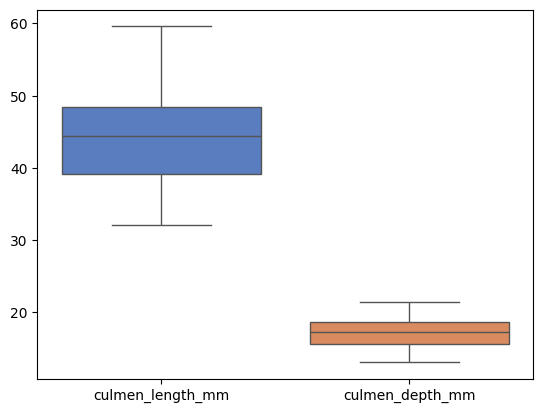

In [39]:
out = df[['culmen_length_mm','culmen_depth_mm']]
sns.boxplot(out)


There are certain outliers in the various column but may be these outliers are a part of the features of the penguin that are very rare in case to find such penguin.

#7) Check categorical columns and perform encoding

In [40]:
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


There are 3 categorical columns

In [41]:
df1['species'].value_counts(dropna = True)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [42]:
df1['sex'].value_counts(dropna = True)

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In the sex column '.' that is an extra values that is undefined and show irrelevant information. So replacing with male values because the majority of the male is greater than female values

In [43]:
df1['sex'] = df1['sex'].str.replace('.','MALE')

<ipython-input-43-bcd2043ed2a1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['sex'] = df1['sex'].str.replace('.','MALE')


In [44]:
df1['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [45]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

Performing label encoding

In [46]:
category = df1[['species','island','sex']]

In [47]:
from sklearn.preprocessing import LabelEncoder
for coln in category:
  #Initialize the label Encoder
  le = LabelEncoder()
  #Fit and Tranform the category
  df1[coln] = le.fit_transform(df1[coln])

In [48]:
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4201.754386,1
340,2,0,46.80000,14.30000,215.000000,4850.000000,0
341,2,0,50.40000,15.70000,222.000000,5750.000000,1
342,2,0,45.20000,14.80000,212.000000,5200.000000,0


In [49]:
df1['island'].value_counts()

0    168
1    124
2     52
Name: island, dtype: int64

In [50]:
df1['species'].value_counts()

0    152
2    124
1     68
Name: species, dtype: int64

In [51]:
df1['sex'].unique()

array([1, 0])

# 8) Split the data into dependent and independent variables

In [52]:
x1 = df1.iloc[:,1:]
y = df1.iloc[:,0:1]

In [53]:
x1.shape

(344, 6)

In [54]:
x1.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [55]:
y.shape

(344, 1)

In [56]:
y.columns

Index(['species'], dtype='object')

# 9) Scaling the data

In [57]:
from sklearn.preprocessing import MinMaxScaler

#Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Fit and Transform data
x = scaler.fit_transform(x1)

In [58]:
x

array([[1.        , 0.25454545, 0.66666667, 0.15254237, 0.29166667,
        1.        ],
       [1.        , 0.26909091, 0.51190476, 0.23728814, 0.30555556,
        0.        ],
       [1.        , 0.29818182, 0.58333333, 0.38983051, 0.15277778,
        0.        ],
       ...,
       [0.        , 0.66545455, 0.30952381, 0.84745763, 0.84722222,
        1.        ],
       [0.        , 0.47636364, 0.20238095, 0.6779661 , 0.69444444,
        0.        ],
       [0.        , 0.64727273, 0.35714286, 0.69491525, 0.75      ,
        1.        ]])

# 10) Split the data into training and testing

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 45)

In [60]:
print(x_train.shape,x_test.shape)

(275, 6) (69, 6)


In [61]:
print(y_train.shape,y_test.shape)

(275, 1) (69, 1)


# 11) Build the Model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#12) Train the model

In [63]:
lr = LogisticRegression()
svm = SVC(kernel="rbf")
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [64]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:
svm.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [66]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#13) Test the model

In [67]:
pred1 = lr.predict(x_test)
pred2 = svm.predict(x_test)
pred3 = dt.predict(x_test)

In [68]:
print(pred1)
print(pred2)
print(pred3)

[0 2 2 0 0 0 0 1 1 0 2 0 2 2 0 2 2 0 0 2 0 1 2 1 1 0 1 1 0 2 1 2 0 0 2 0 0
 2 2 0 0 0 2 1 2 2 0 2 1 2 2 1 1 0 0 2 2 0 0 0 1 0 1 2 2 2 2 2 0]
[0 2 2 0 0 0 0 1 1 0 2 0 2 2 0 2 2 0 0 2 0 1 2 1 1 1 1 1 0 2 1 2 0 0 2 0 0
 2 2 0 0 0 2 1 2 2 0 2 1 2 2 1 1 0 0 2 2 0 0 0 1 0 1 2 2 2 2 2 0]
[0 2 2 0 0 0 0 1 1 0 2 0 2 2 0 2 2 0 0 2 0 1 2 1 1 0 1 1 0 2 1 2 0 0 2 0 0
 2 2 0 2 1 2 1 2 2 0 2 1 2 2 1 1 0 0 2 2 0 0 0 1 0 1 2 1 2 2 2 0]


# 14) Measure the performance using Evaluation metrics

In [69]:
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix

In [70]:
print(f"Logistic Regression \nAccuracy :{accuracy_score(y_test,pred1)}\nR2 score:{r2_score(y_test,pred1)}")
print(confusion_matrix(y_test,pred1))

Logistic Regression 
Accuracy :0.9855072463768116
R2 score:0.9814814814814815
[[27  0  0]
 [ 1 14  0]
 [ 0  0 27]]


In [71]:
print(f"SVM \nAccuracy :{accuracy_score(y_test,pred2)}\nR2 score:{r2_score(y_test,pred2)}")
print(confusion_matrix(pred1,y_test))

SVM 
Accuracy :1.0
R2 score:1.0
[[27  1  0]
 [ 0 14  0]
 [ 0  0 27]]


In [72]:
print(f"Decision Tree \nAccuracy :{accuracy_score(y_test,pred3)}\nR2 score:{r2_score(y_test,pred3)}")

Decision Tree 
Accuracy :0.9420289855072463
R2 score:0.8703703703703703
